In [1]:
import pandas as pd
import re
df=pd.read_csv("itjobstable.csv")

# Delete Unnamed column
df=df.drop("Unnamed: 0", axis=1)
df.drop_duplicates(inplace=True)

df["internship"]=df["job_type"].apply(lambda x: "1" if "Internship" in x else "0")
df["job_type"]=df["job_type"].apply(lambda x: x.replace("Permanent",""))
df["ft/pt"]=df["job_type"].apply(lambda x: "p" if "Part Time" in x else "f")

#Clean Industry
df["industry"]=df["industry"].apply(lambda x: str(re.search("(\w+)((\s)(\w+))?((\s)(\w+))?",x).group()))

df["data"]=df["title"].apply(lambda x: "1" if x.lower().find('data') >=0 else "0")
df["entry"]=df["career_level"].apply(lambda x: "1" if x.lower().find('entry level') >=0 else "0")

#Clean Salary
df["salary"]=df["salary"].apply(lambda x: x.replace(",","").replace("HK$",""))
df["salary"]=df["salary"].apply(lambda x: "Not Specified" if "Posted" in x else x)
df["salary"]=df["salary"].apply(lambda x: str(re.search('(\d+)((\s)(-)(\s)(\d+))?',x).group()) if "/" in x else x)
#calculate the mean of a salary range
def average(x):
    if "-" in x:
        y = x.split(" - ")
        z=0
        for i in y:
            z+=int(i)
        return round(z/2)
    else:
        return x
df["salary"]=df["salary"].apply(lambda x: average(x))

#Clean post_date 
df["post_date"]=df["post_date"].apply(lambda x: re.search("\d.+",x).group())
df['post_date']=pd.to_datetime(df['post_date'])

#Clean qualification
df["qualification"]=df["qualification"].apply(lambda x: "Not Specified" if x=="(N/A)" else x)
 
#Clean Experience
def clean(x):
    if 'year' in x:
        return int(re.search('\d+',x).group())
    else:
        return "Not Specified"
df["experience"]=df["experience"].apply(lambda x: clean(str(x)))

In [3]:
analysis=df
analysis.head() 

,title,company,location,salary,post_date,career_level,qualification,experience,job_type,industry,internship,ft/pt,data,entry
0,Software Engineer (Web),Memoriki Limited,Kwun Tong,Salary provided,2021-04-12,Not Specified,Degree,1,"Full Time,",Information Technology,0,f,0,0
1,Sales Operations Assistant,HKT,Kowloon Bay,Not Specified,2021-04-12,Entry Level,Non-Degree Tertiary,1,"Full Time,",Telecommunication,0,f,0,1
2,IT Technical Support,Human Health (H.K) Limited,Tsim Sha Tsui,Salary negotiable,2021-04-12,Entry Level,Non-Degree Tertiary,1,"Full Time,",Medical,0,f,0,1
3,"Software Engineer, Frontend",Aigens Technology Limited,Kwun Tong Area,Salary provided,2021-04-12,Not Specified,Not Specified,Not Specified,"Full Time,",Information Technology,0,f,0,0
4,"Manager, Software Development",Principal Insurance Company (Hong Kong) Limited,Kwun Tong,Not Specified,2021-04-12,Middle,Degree,10,"Full Time, Part Time,",Insurance,0,p,0,0


new Q1. Find the job opening for different career level (Entry, Middle, Senior, Top…)

AxesSubplot(0.125,0.125;0.775x0.755)


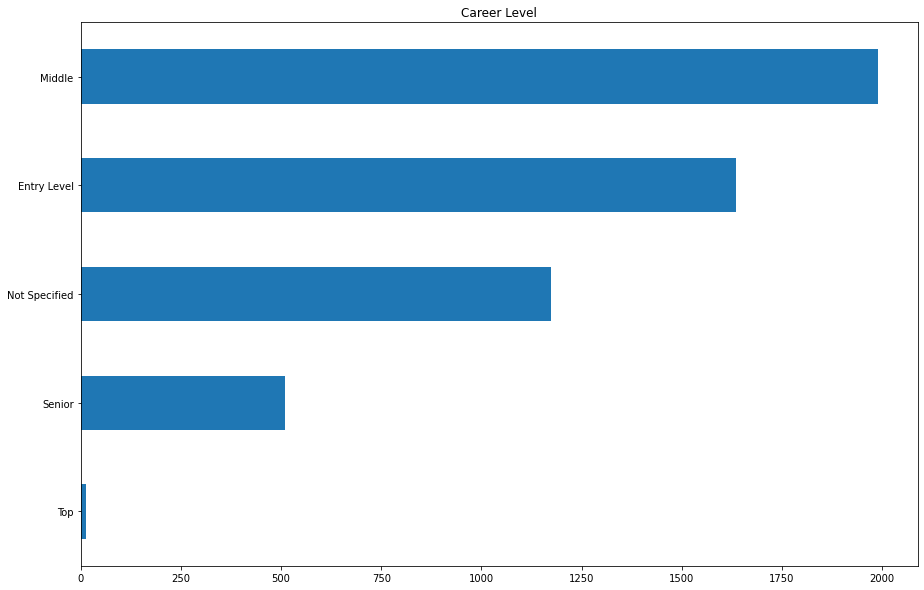

In [6]:
carrer_level = analysis.career_level.value_counts().sort_values()
print(carrer_level.plot.barh(title="Career Level", figsize=(15,10)))


AxesSubplot(0.135,0.125;0.755x0.755)


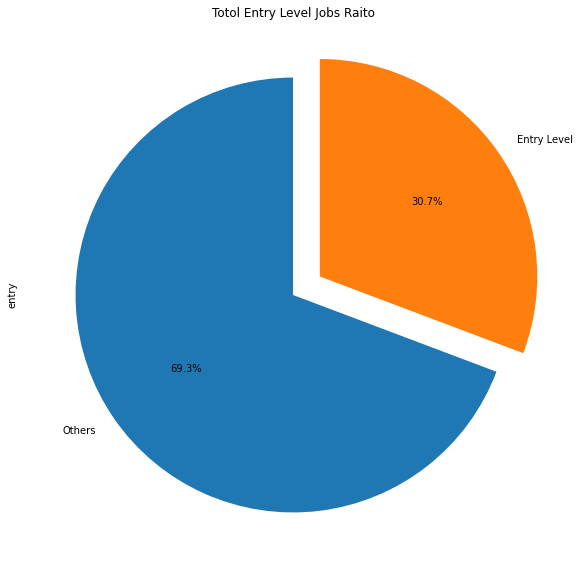

In [5]:
analysis["entry"].value_counts()
entry_percent = analysis["entry"].value_counts().plot.pie(y=analysis.index,
                                                    title="Totol Entry Level Jobs Raito",
                                                    labels=["Others", "Entry Level"],
                                                    explode=(0, 0.15),
                                                    startangle=90,
                                                    autopct="%1.1f%%",
                                                    figsize=(10,10))
print(entry_percent)

new Q2. Find the number of internship

In [8]:
analysis.internship.value_counts()

0    5252
1      70
Name: internship, dtype: int64

new Q3. Find the top 3 industries with most entry level job opening

<AxesSubplot:title={'center':'No. of Entry Level Jobs'}, ylabel='industry'>

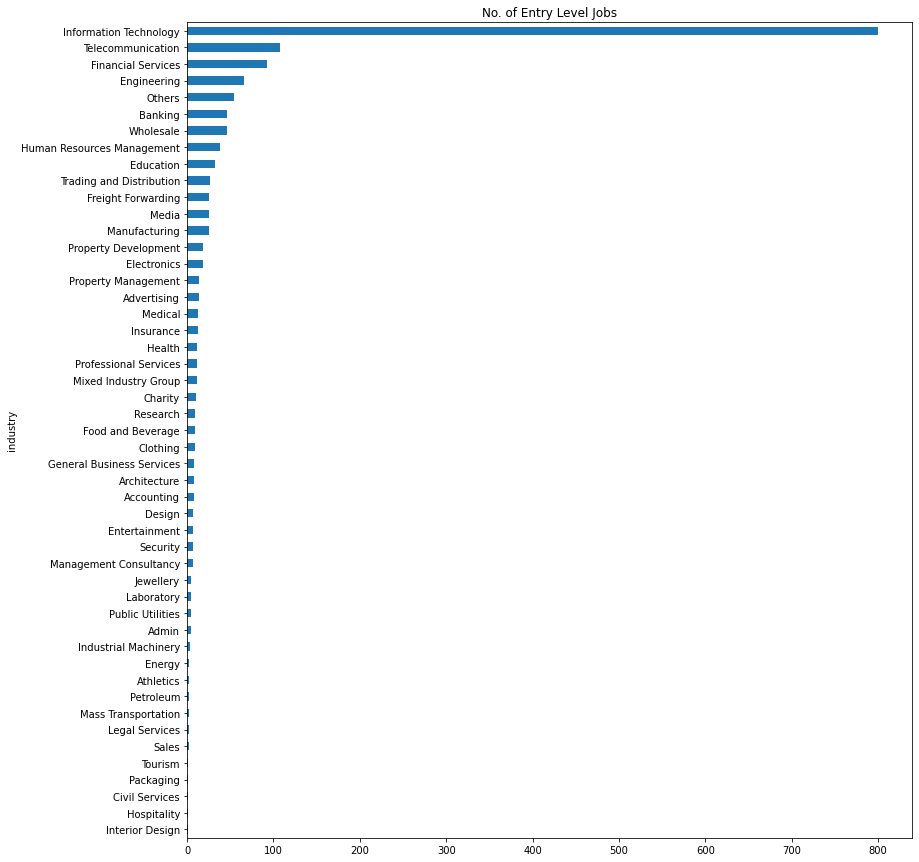

In [10]:
entry = analysis.groupby("entry")["industry"].value_counts().sort_values()
entry.loc["1"].plot.barh(title="No. of Entry Level Jobs", figsize=(13,15))

<AxesSubplot:title={'center':'No. of Entry Level Jobs except IT Industry'}, ylabel='industry'>

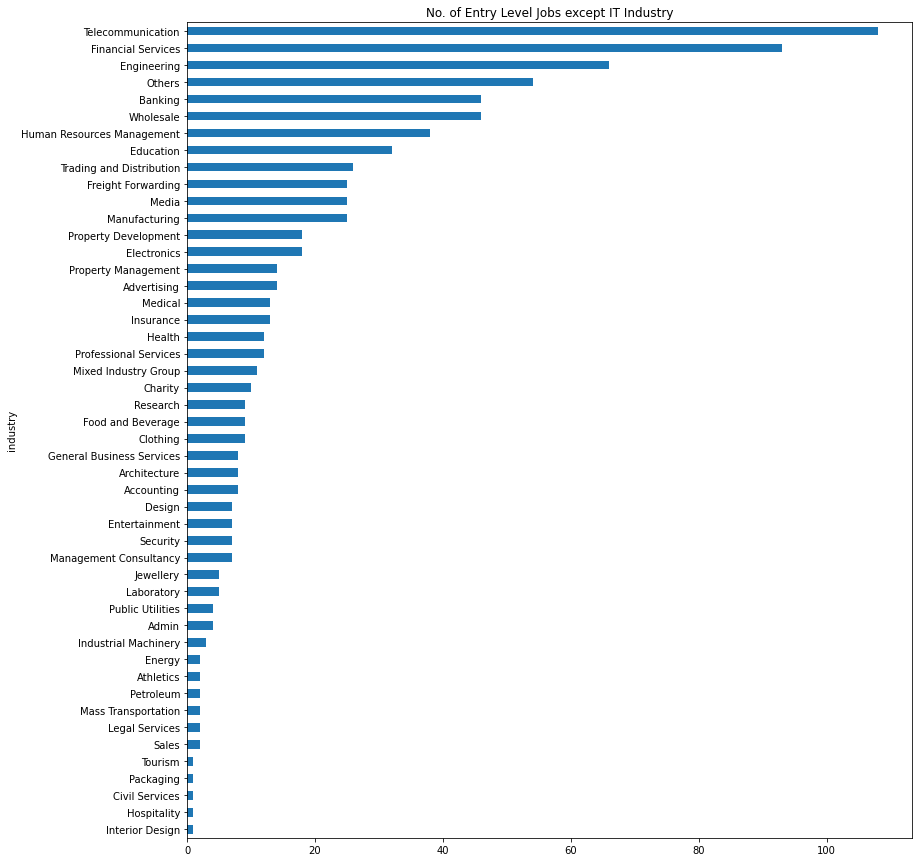

In [11]:
entry_no_it = analysis.groupby("entry")["industry"].value_counts().sort_values()[:-2]
entry_no_it.loc["1"].plot.barh(title="No. of Entry Level Jobs except IT Industry", figsize=(13,15))

new Q4. Average salary of entry level jobs in each industry

<ipython-input-27-0fa2af904ab3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ent_w_num_sal["salary"]=ent_w_num_sal["salary"].astype(int)


<AxesSubplot:title={'center':'Average Salary for each Industry within Entry Level job'}, ylabel='industry'>

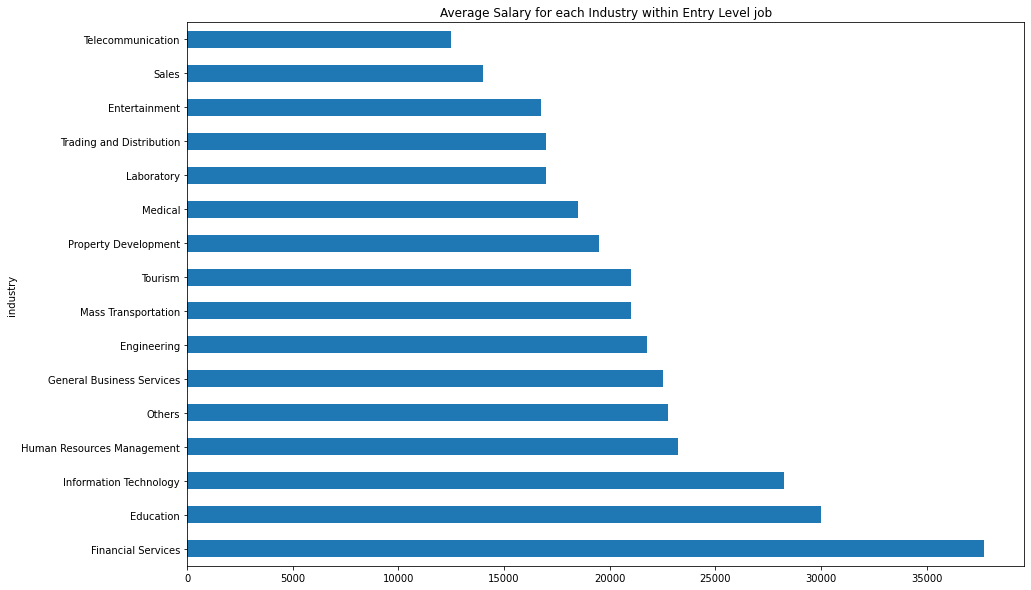

In [27]:
entry=analysis[analysis["career_level"]=="Entry Level"]

ent_w_num_sal=entry[pd.to_numeric(entry['salary'],errors='coerce')>=0]
ent_w_num_sal["salary"]=ent_w_num_sal["salary"].astype(int)
ent_ind_sal=round(ent_w_num_sal.groupby("industry")["salary"].mean().sort_values(ascending=False))
ent_ind_sal.plot(kind="barh", figsize=(15,10), ylabel="salary(HK$)", title="Average Salary for each Industry within Entry Level job")

new Q5. Find the qualifications needed to land an entry level job

<AxesSubplot:title={'center':'Qualification needed for Entry Level Job'}, xlabel='Qualification', ylabel='Entry Level Job Count'>

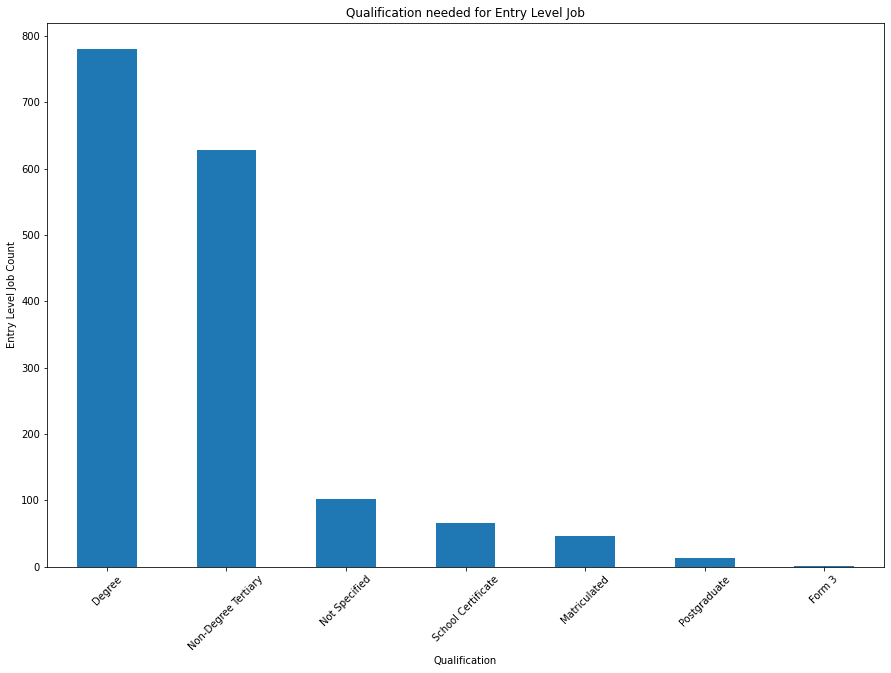

In [13]:
rp= analysis[analysis["career_level"]=="Entry Level"]["qualification"].value_counts()

rp.plot(kind="bar", figsize=(15,10), ylabel="Entry Level Job Count", xlabel="Qualification", title="Qualification needed for Entry Level Job",rot=45)

new Q6. Average Salary of entry level jobs with different qualifications

<ipython-input-30-82af5fc7676b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ent_w_num_sal["salary"]=ent_w_num_sal["salary"].astype(int)


<AxesSubplot:title={'center':'Average Salary for each Qualification within Entry Level job'}, xlabel='qualification', ylabel='salary(HK$)'>

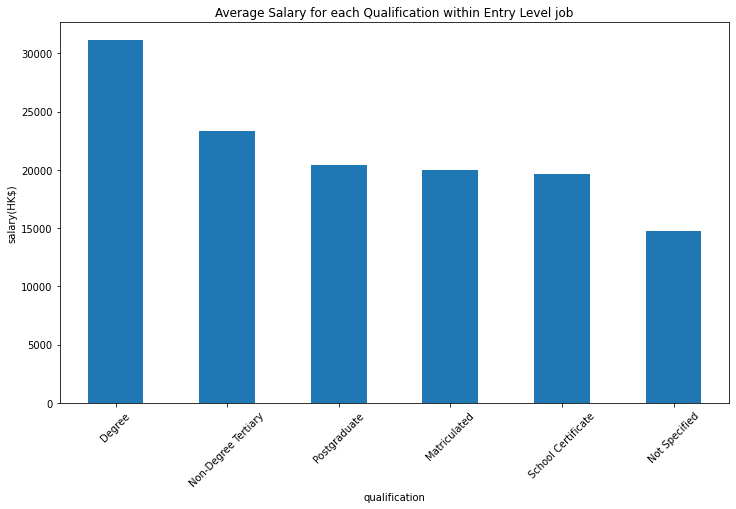

In [30]:
entry=analysis[analysis["career_level"]=="Entry Level"]

ent_w_num_sal=entry[pd.to_numeric(entry['salary'],errors='coerce')>=0]
ent_w_num_sal["salary"]=ent_w_num_sal["salary"].astype(int)
ent_deg_sal=round(ent_w_num_sal.groupby("qualification")["salary"].mean().sort_values(ascending=False))
ent_deg_sal.plot(kind="bar",rot=45, figsize=(12,7), ylabel="salary(HK$)", title="Average Salary for each Qualification within Entry Level job")
#ent_deg_sal=ent_w_num_sal.groupby("qualification")["salary"].plot.kde(figsize=(10,5))

new Q7. Find the jobs opening with one year or less experience.


<AxesSubplot:title={'center':'Job Experiences advertised'}, xlabel='Year of experience', ylabel='Number of Adds'>

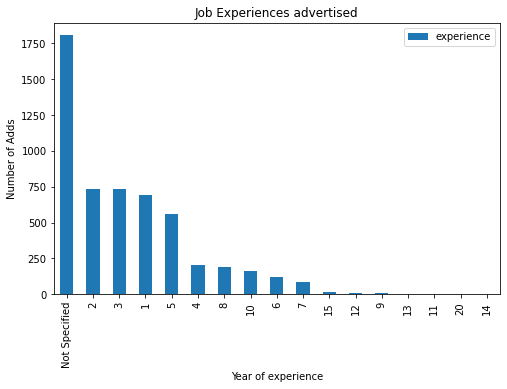

In [38]:
mm=analysis.experience.value_counts()
mm.sort_values() 
nn=pd.DataFrame(mm)

nn.plot.bar(ylabel="Number of Adds", title="Job Experiences advertised", xlabel="Year of experience", figsize=(8,5))